## 可视化第一课（matplotlib）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Visualization1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析
* 从seaborn库中载入flights数据并查看表头

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


* 分析年度乘客总量变化情况（折线图）

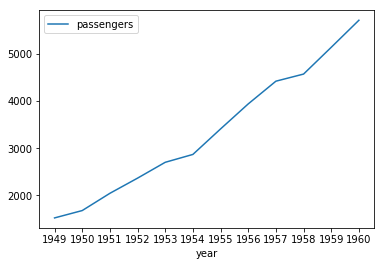

In [3]:
df_year = data.groupby(["year"]).sum()
df_year.plot(kind="line", xticks=df_year.index)
# df_year.plot(kind="scatter")

* 分析乘客在一年中各月份的分布（柱状图）

([<matplotlib.axis.XTick at 0x1b842908>,
 <a list of 12 Text xticklabel objects>)

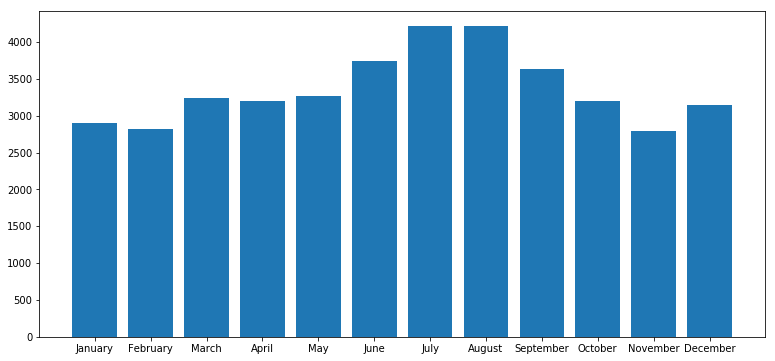

In [4]:
df_month = data.groupby(["month"]).sum().reset_index()
# names = df_month.index
# df_month = df_month.
plt.figure(figsize=(13, 6))
plt.bar(df_month.index, df_month.passengers)
plt.xticks(df_month.index, labels=df_month.month)

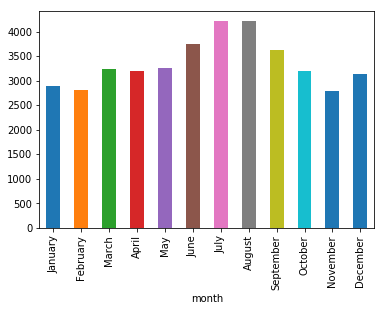

In [5]:
data.groupby('month')['passengers'].sum().plot(kind='bar')

## 练习2：鸢尾花花型尺寸分析

* 从seaborn库中载入flights数据并查看表头

In [6]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类
print(set(data["species"]))

{'versicolor', 'setosa', 'virginica'}


* 萼片（sepal）和花瓣（petal）的大小关系（散点图）

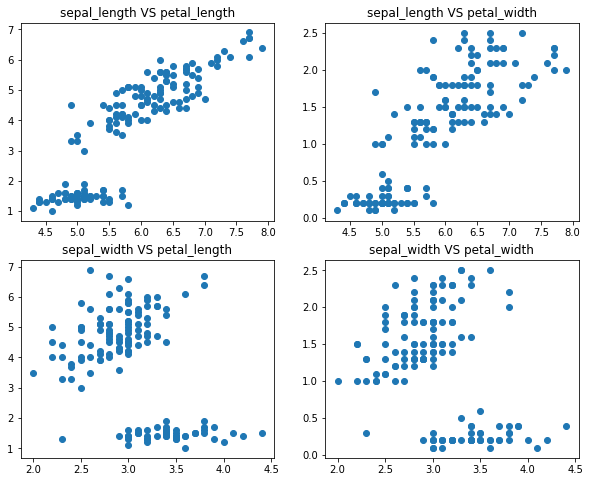

In [7]:
mpl.rc("figure", figsize=(10,8))



def sepal_petal(data, xlabel, ylabel, num):
    axes = plt.subplot(2,2,num)
    axes.scatter(data[xlabel], data[ylabel])
    axes.set_title(xlabel+" VS "+ylabel)

sepal_petal(data, 'sepal_length', 'petal_length',1)
sepal_petal(data, 'sepal_length', 'petal_width',2)
sepal_petal(data, 'sepal_width', 'petal_length',3)
sepal_petal(data, 'sepal_width', 'petal_width',4)

* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

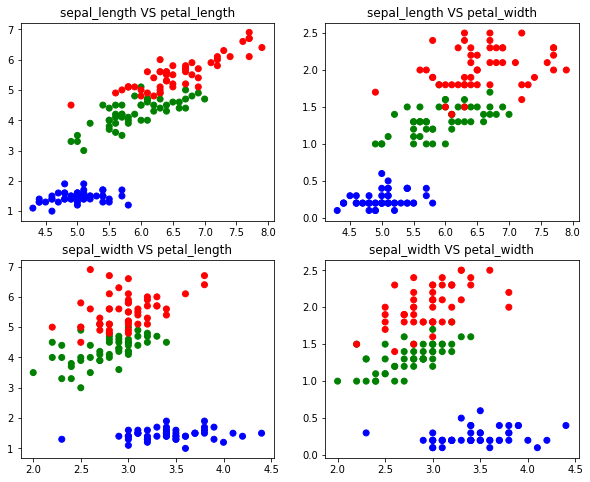

In [8]:
cmap = {'virginica':"red", 'setosa':"blue", 'versicolor':"green"}
cc = [cmap[x] for x in data["species"]]


def sepal_petal2(data, xlabel, ylabel, num):
    axes = plt.subplot(2,2,num)
    axes.scatter(data[xlabel], data[ylabel],c=cc)
    axes.set_title(xlabel+" VS "+ylabel)

sepal_petal2(data, 'sepal_length', 'petal_length',1)
sepal_petal2(data, 'sepal_length', 'petal_width',2)
sepal_petal2(data, 'sepal_width', 'petal_length',3)
sepal_petal2(data, 'sepal_width', 'petal_width',4)


* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

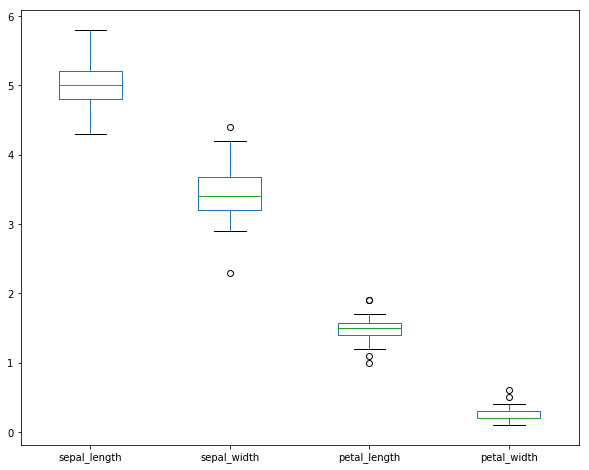

In [9]:
data.loc[data.species == "setosa", :].plot(kind="box")

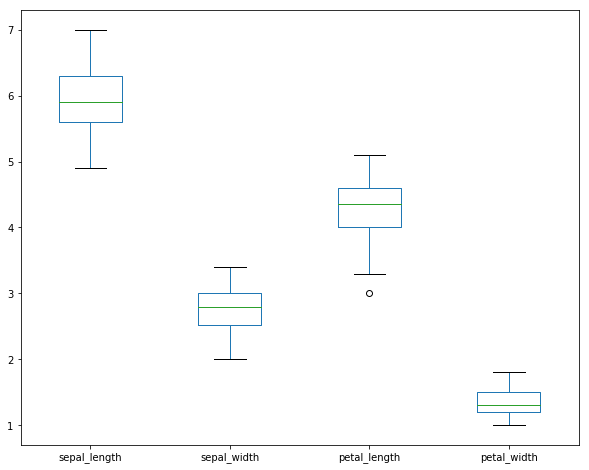

In [10]:
data.loc[data.species == "versicolor", :].plot(kind="box")

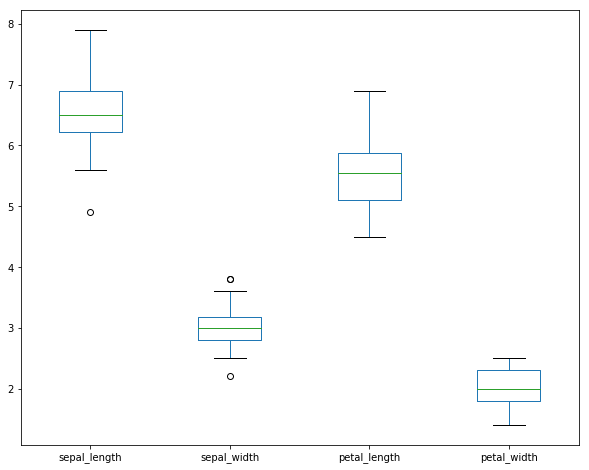

In [11]:
data.loc[data.species == "virginica", :].plot(kind="box")

## 练习3：餐厅小费情况分析


In [12]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

* 小费和总消费之间的关系（散点图）

Text(0, 0.5, 'tips')

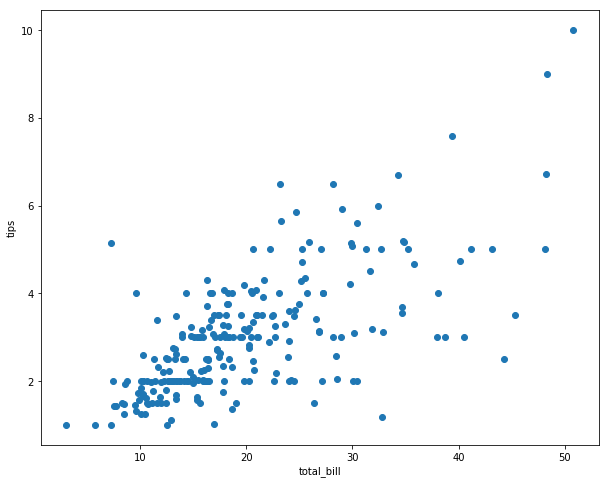

In [14]:
plt.scatter(data.total_bill, data.tip)
plt.xlabel("total_bill")
plt.ylabel("tips")


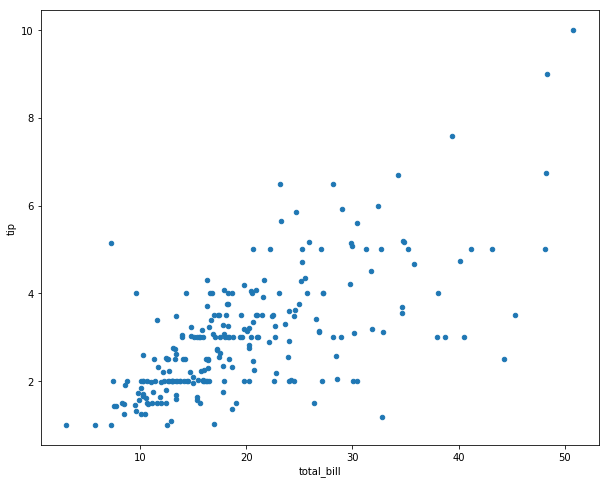

In [15]:
data.plot.scatter(x='total_bill', y='tip')

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd62390>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd62a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd43f28>,
 'medians': [<matplotlib.lines.Line2D at 0x1bd62cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bd62d30>,
 'means': []}

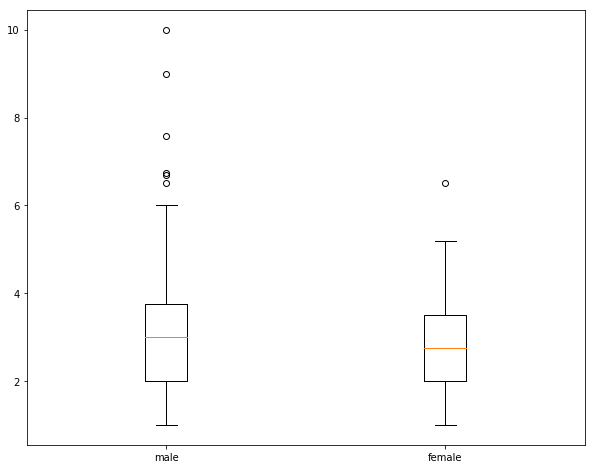

In [16]:
plt.boxplot([data.loc[data.sex == "Male", "tip"], data.loc[data.sex == "Female", "tip"]], labels=["male", "female"])

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbd2e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbe8828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbd2d30>,
 'medians': [<matplotlib.lines.Line2D at 0x1bbe8eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bbe8e10>,
 'means': []}

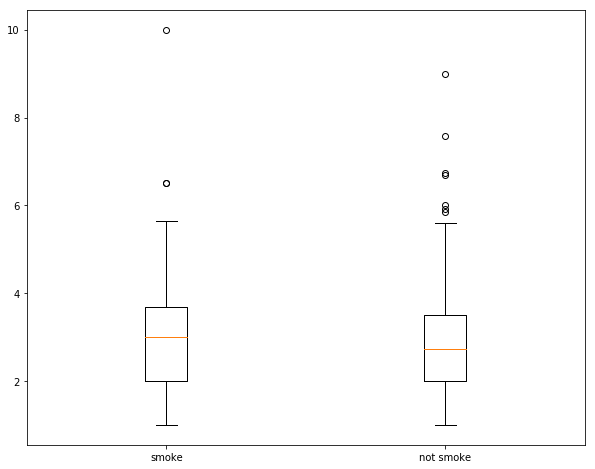

In [17]:
plt.boxplot([data.loc[data.smoker == "Yes", "tip"], data.loc[data.smoker == "No", "tip"]], labels=["smoke", "not smoke"])

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9abf28>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9b8860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9abdd8>,
 'medians': [<matplotlib.lines.Line2D at 0x1b9b8ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b9b8e48>,
 'means': []}

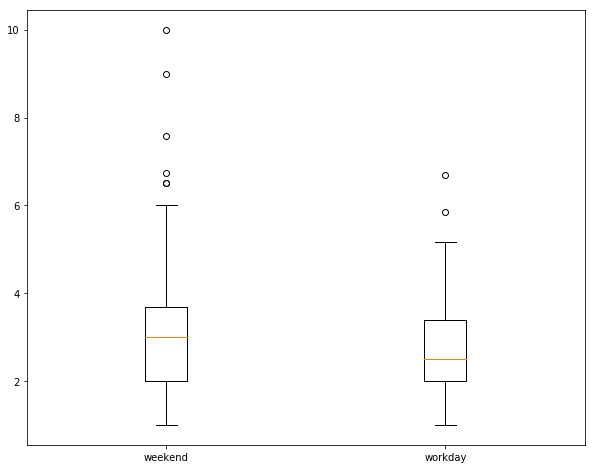

In [18]:
plt.boxplot([data.loc[data.day.isin(["Sat", "Sun"]), "tip"], data.loc[data.day.isin(["Thur","Fri"]), "tip"]], labels=["weekend", "workday"])


* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb90fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb90f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb90ba8>,
 'medians': [<matplotlib.lines.Line2D at 0x1b98fd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b98fc88>,
 'means': []}

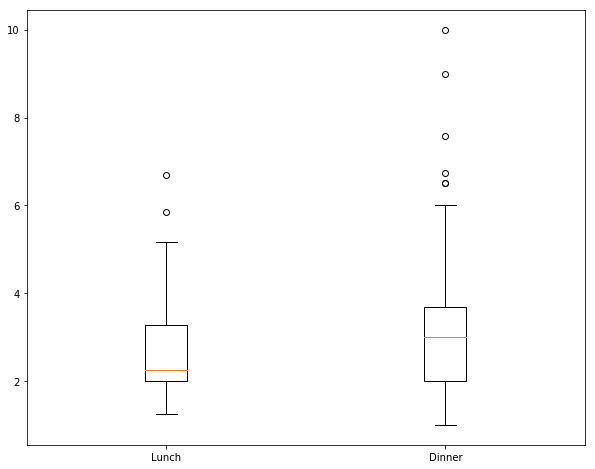

In [19]:
data.time.value_counts()
plt.boxplot([data.loc[data.time == "Lunch", "tip"], data.loc[data.time == "Dinner", "tip"]], labels=["Lunch", "Dinner"])


* 就餐人数是否会对慷慨度产生影响（分类箱式图）

{'whiskers': [<matplotlib.lines.Line2D at 0x1c281dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c281da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c277cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c285b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c285e80>,
 'means': []}

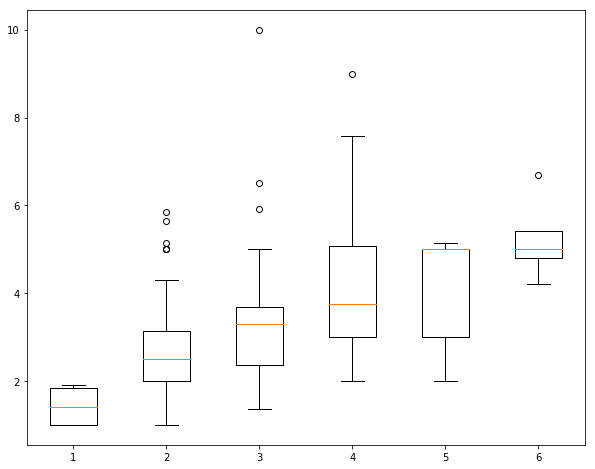

In [20]:
p_count = sorted(data["size"].unique())
d = []
l = []
for cnt in p_count:
    d.append(data.loc[data["size"] == cnt, "tip"])
    l.append(str(cnt))
    
plt.boxplot(x=d, labels=l)

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

Text(0.5, 1.0, 'Sex&Smoker vs Tip')

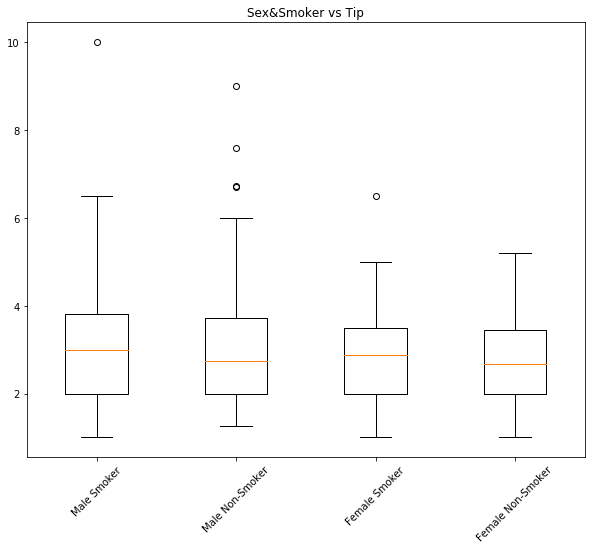

In [21]:
plt.xticks(rotation=45)
d = []
l = []
for gender in ['Male', 'Female']:
    for isSmoker in ['Yes', 'No']:
        d.append(data.loc[(data['sex'] == gender) & (data['smoker'] == isSmoker), 'tip'])
        l.append(gender + ' ' + ('Non-' if isSmoker == 'No' else '') + 'Smoker')
plt.boxplot(d, labels=l)
plt.title('Sex&Smoker vs Tip')

## 练习4：泰坦尼克号海难幸存状况分析
* 载入数据集

In [22]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
data.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

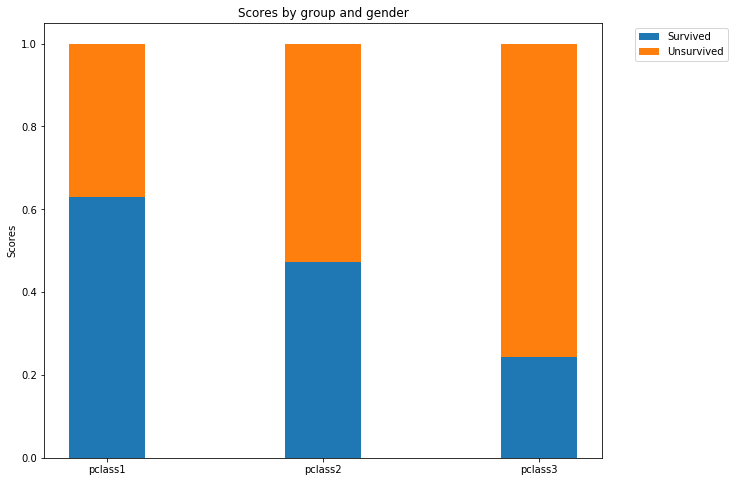

In [24]:
# pclass, survived
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html

def stackbarplot(df, labels):
    N = len(labels)
    survives = df['survived']
    unsurvives = df['unsurvived']

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, survives, width)
    p2 = plt.bar(ind, unsurvives, width, bottom=survives)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind, labels)
    # plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Survived', 'Unsurvived'), bbox_to_anchor=(1.05,1))
    
df_pclass = data[['pclass', 'survived']].groupby('pclass', as_index=False)['survived'].mean()
df_pclass["unsurvived"] = 1 - df_pclass.survived
# df_pclass
stackbarplot(df_pclass, ('pclass1', 'pclass2', 'pclass3'))

* 不同性别的幸存比例（堆积柱状图）

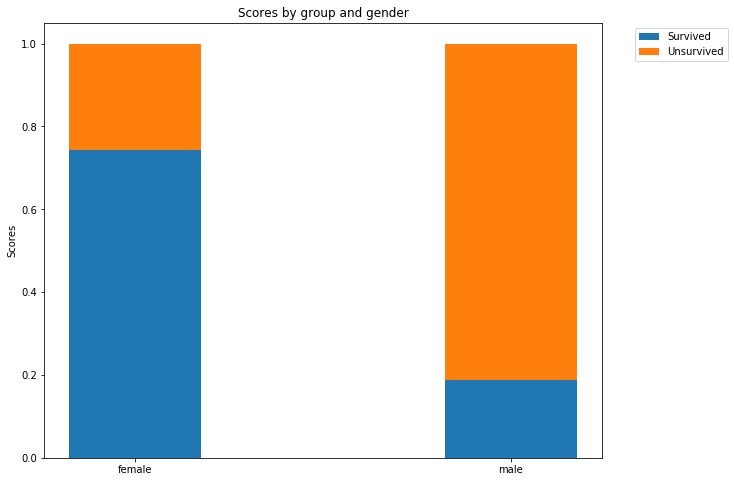

In [25]:
df_sex = data[['sex', 'survived']].groupby('sex', as_index=False)['survived'].mean()
df_sex["unsurvived"] = 1 - df_sex.survived
stackbarplot(df_sex, ('female', 'male'))
# df_sex

* 幸存和遇难乘客的票价分布（分类箱式图）

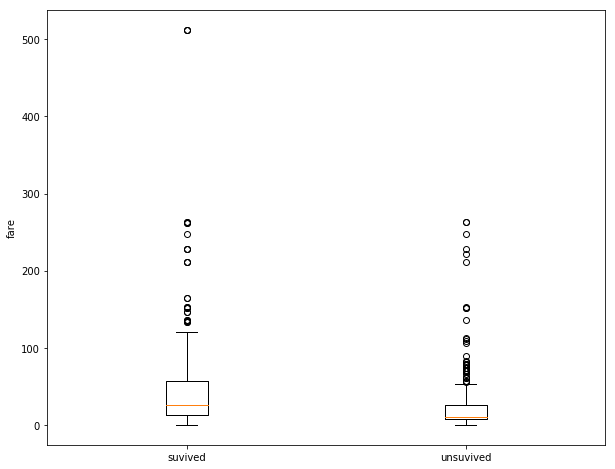

In [26]:
def myboxplot(data, label):
    plt.boxplot([data.loc[data.survived == 1, label], data.loc[data.survived == 0, label]], labels=["suvived", "unsuvived"])
    plt.ylabel(label)
    plt.show()
    
myboxplot(data, "fare")

* 幸存和遇难乘客的年龄分布（分类箱式图）

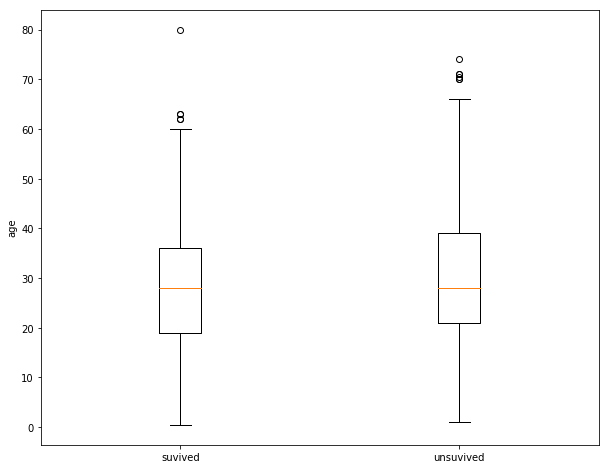

In [27]:
# label = "age"
data_new = data[pd.notna(data.age)]
myboxplot(data_new, "age")

* 不同上船港口的乘客仓位等级分布（分组柱状图）

In [28]:


# data[['embark_town', 'pclass', 'survived']].groupby(['embark_town', "pclass"])['survived'].count().reset_index()
x = data.groupby("embark_town")["pclass"].value_counts()
x.unstack()

pclass,1,2,3
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


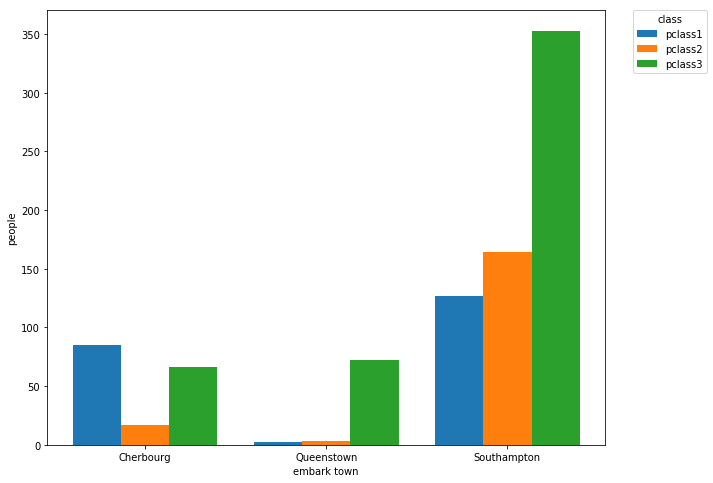

In [29]:

def draw(df):
    x = np.arange(len(df))
#     print(x)
    total_width, n = 0.8, 3
    width = total_width / n
    plt.bar(x - width, df.pclass1, width=width, label='pclass1')
    plt.bar(x, df.pclass2, width=width, label='pclass2')
    plt.bar(x + width, df.pclass3, width=width, label='pclass3')
    plt.xticks(x, df.index)
    plt.xlabel("embark town")
    plt.ylabel("people")
    plt.legend(title="class",
               bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.)



data_pivot = data.pivot_table(values="survived",index="embark_town", columns="pclass", aggfunc="count")
data_pivot.columns = ["pclass1","pclass2","pclass3"]
draw(data_pivot)
# data_pivot

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

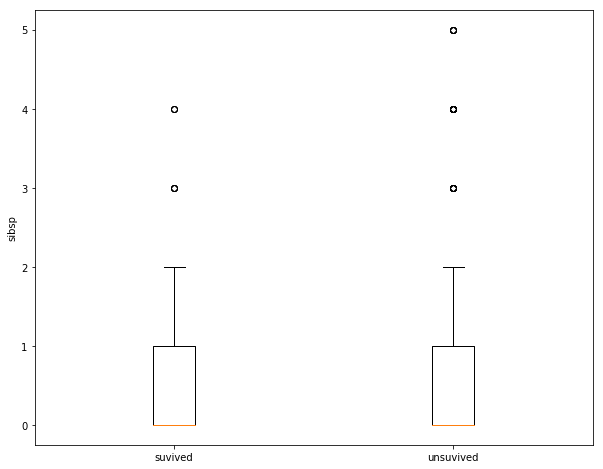

In [30]:
data_new = data[pd.notna(data.age)]
myboxplot(data_new, "sibsp")

In [31]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

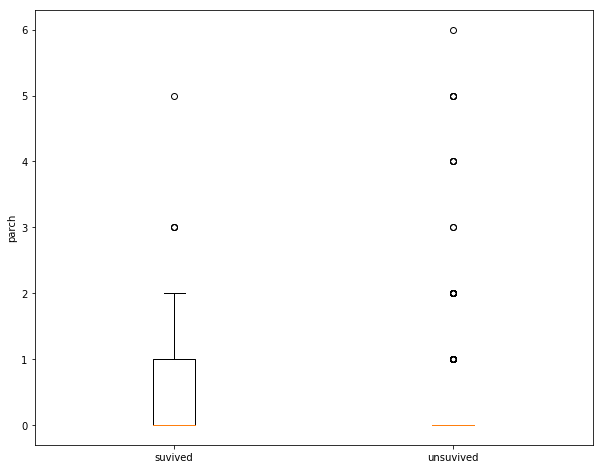

In [32]:
data_new = data[pd.notna(data.age)]
myboxplot(data_new, "parch")

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

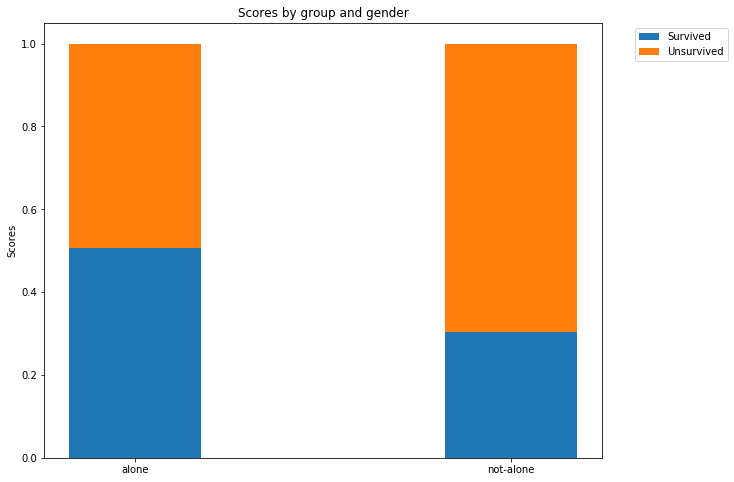

In [33]:
df_pclass = data[['alone', 'survived']].groupby('alone', as_index=False)['survived'].mean()
df_pclass["unsurvived"] = 1 - df_pclass.survived
df_pclass
stackbarplot(df_pclass, ('alone', 'not-alone'))